In [7]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi


%matplotlib inline

In [8]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

In [9]:
# Set the variables for the Alpaca API and secret keys
# YOUR CODE HERE
# YOUR CODE HERE
import alpaca_trade_api as tradeapi

alpaca_api_key=os.getenv("ALPACA_API_KEY")
type(alpaca_api_key)

alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
type(alpaca_secret_key)

# Create the Alpaca tradeapi.REST object
# YOUR CODE HERE
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


# btc eth usdt bnb usdc xrp ada steth hex doge matic sol
# jan 1 to 2013 jan 2023

In [10]:
# Set the tickers for both the bond and stock portion of the portfolio
# YOUR CODE HERE"
tickers = ["AAPL", "MSFT", "AMZN", "GOOGL", "FB", "JNJ", "JPM", "V", "PG", "TSLA"]

# Set timeframe to 1Day
# YOUR CODE HERE
timeframe = "1D"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
# YOUR CODE HERE
# YOUR CODE HERE
start_date = pd.Timestamp("2013-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-01-01", tz="America/New_York").isoformat()

In [11]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
# YOUR CODE HERE
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE
AAPL = df_portfolio[df_portfolio['symbol']=='AAPL'].drop('symbol', axis=1)
MSFT = df_portfolio[df_portfolio['symbol']=='MSFT'].drop('symbol', axis=1)
AMZN = df_portfolio[df_portfolio['symbol']=='AMZN'].drop('symbol', axis=1)
GOOGL = df_portfolio[df_portfolio['symbol']=='GOOGL'].drop('symbol', axis=1)
FB = df_portfolio[df_portfolio['symbol']=='FB'].drop('symbol', axis=1)
JNJ = df_portfolio[df_portfolio['symbol']=='JNJ'].drop('symbol', axis=1)
JPM = df_portfolio[df_portfolio['symbol']=='JPM'].drop('symbol', axis=1)
V = df_portfolio[df_portfolio['symbol']=='V'].drop('symbol', axis=1)
PG = df_portfolio[df_portfolio['symbol']=='PG'].drop('symbol', axis=1)
TSLA = df_portfolio[df_portfolio['symbol']=='TSLA'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
# YOUR CODE HERE
df_portfolio = pd.concat([AAPL, MSFT, AMZN, GOOGL, FB,JNJ, JPM, V, PG, TSLA],axis=1, keys=["AAPL", "MSFT", "AMZN", "GOOGL", "FB", "JNJ", "JPM", "V", "PG", "TSLA"])

# Review the first 5 rows of the Alpaca DataFrame
# YOUR CODE HERE
display(df_portfolio.head(10))
display(df_portfolio.tail(10))

AAPL                                     \
                             open    high      low   close    volume   
timestamp                                                              
2015-12-01 05:00:00+00:00  118.75  118.81  116.860  117.34  34852374   
2015-12-02 05:00:00+00:00  117.05  118.11  116.080  116.28  33385643   
2015-12-03 05:00:00+00:00  116.55  116.79  114.220  115.20  41560785   
2015-12-04 05:00:00+00:00  115.29  119.25  115.110  119.03  57776977   
2015-12-07 05:00:00+00:00  118.98  119.86  117.810  118.28  32080754   
2015-12-08 05:00:00+00:00  117.52  118.60  116.860  118.23  34309450   
2015-12-09 05:00:00+00:00  117.64  117.69  115.080  115.62  45852027   
2015-12-10 05:00:00+00:00  116.04  116.94  115.510  116.17  29212727   
2015-12-11 05:00:00+00:00  115.00  115.39  112.851  113.18  46886161   
2015-12-14 05:00:00+00:00  112.18  112.68  109.790  112.48  64941651   

                                                    MSFT                 ...  \
                          trade_count        vwap   open    high    low  ...   
timestamp                                                                ...   
2015-12-01 05:00:00+00:00      187129  117.756760  54.41  55.230  54.30  ...   
2015-12-02 05:00:00+00:00      180616  117.151198  55.32  55.960  55.06  ...   
2015-12-03 05:00:00+00:00      245330  115.434888  55.49  55.770  53.93  ...   
2015-12-04 05:00:00+00:00      307788  118.187290  54.12  56.230  54.10  ...   
2015-12-07 05:00:00+00:00      190809  118.509111  55.79  55.970  55.29  ...   
2015-12-08 05:00:00+00:00      186353  117.821219  55.47  56.100  54.99  ...   
2015-12-09 05:00:00+00:00      242397  116.097962  55.37  55.870  54.51  ...   
2015-12-10 05:00:00+00:00      169277  116.168612  55.39  55.655  55.01  ...   
2015-12-11 05:00:00+00:00      273846  113.702024  54.71  55.100  54.01  ...   
2015-12-14 05:00:00+00:00      371153  111.412680  54.33  55.210  53.68  ...   

                                 PG                           TSLA          \
                             volume trade_count       vwap    open    high   
timestamp                                                                    
2015-12-01 05:00:00+00:00   8391666       49691  75.783613  231.06  238.00   
2015-12-02 05:00:00+00:00   8104185       51595  75.996004  237.00  238.60   
2015-12-03 05:00:00+00:00  11178640       68481  75.636100  235.48  237.45   
2015-12-04 05:00:00+00:00  12107922       72312  77.450477  232.46  233.27   
2015-12-07 05:00:00+00:00   9459974       59222  78.188738  228.51  235.63   
2015-12-08 05:00:00+00:00   8312746       56330  77.828700  227.52  228.80   
2015-12-09 05:00:00+00:00  10129339       68108  78.094464  226.70  227.50   
2015-12-10 05:00:00+00:00   8984191       61448  77.976889  224.71  228.49   
2015-12-11 05:00:00+00:00  12280742       82481  77.783453  225.24  225.75   
2015-12-14 05:00:00+00:00  12178954       86058  77.974460  217.51  220.92   

                                                                            
                              low   close   volume trade_count        vwap  
timestamp                                                                   
2015-12-01 05:00:00+00:00  231.05  237.19  3733955       34802  235.229784  
2015-12-02 05:00:00+00:00  231.23  231.99  2981468       24892  234.840243  
2015-12-03 05:00:00+00:00  230.00  232.71  2939564       25581  234.006908  
2015-12-04 05:00:00+00:00  227.66  230.38  2573603       21825  230.116350  
2015-12-07 05:00:00+00:00  226.15  231.13  3144223       25567  231.161332  
2015-12-08 05:00:00+00:00  224.20  226.72  2687636       25814  226.727299  
2015-12-09 05:00:00+00:00  220.72  224.52  3057753       27628  224.267638  
2015-12-10 05:00:00+00:00  223.64  227.07  2071692       18190  226.968952  
2015-12-11 05:00:00+00:00  216.64  217.02  3268726       30696  220.793802  
2015-12-14 05:00:00+00:00  214.87  218.58  2831518       26270  217.853436  

[10 rows x 70 columns]

AAPL                                       \
                              open      high     low   close     volume   
timestamp                                                                 
2022-12-16 05:00:00+00:00  136.685  137.6500  133.73  134.51  160026698   
2022-12-19 05:00:00+00:00  135.110  135.2000  131.32  132.37   79592614   
2022-12-20 05:00:00+00:00  131.390  133.2500  129.89  132.30   77435044   
2022-12-21 05:00:00+00:00  132.980  136.8100  132.75  135.45   85928092   
2022-12-22 05:00:00+00:00  134.352  134.5600  130.30  132.23   77858360   
2022-12-23 05:00:00+00:00  130.920  132.4150  129.64  131.86   63826892   
2022-12-27 05:00:00+00:00  131.380  131.4100  128.72  130.03   69007830   
2022-12-28 05:00:00+00:00  129.670  131.0275  125.87  126.04   85440007   
2022-12-29 05:00:00+00:00  127.990  130.4814  127.73  129.61   75818001   
2022-12-30 05:00:00+00:00  128.410  129.9500  127.43  129.93   77779765   

                                                      MSFT                     \
                          trade_count        vwap     open     high       low   
timestamp                                                                       
2022-12-16 05:00:00+00:00      819250  134.946521  248.550  249.840  243.5100   
2022-12-19 05:00:00+00:00      705820  132.466679  244.860  245.210  238.7100   
2022-12-20 05:00:00+00:00      640695  131.848903  239.400  242.910  238.4200   
2022-12-21 05:00:00+00:00      588684  135.315015  241.690  245.615  240.1100   
2022-12-22 05:00:00+00:00      643296  131.898289  241.255  241.990  233.8700   
2022-12-23 05:00:00+00:00      541275  131.152093  236.110  238.870  233.9428   
2022-12-27 05:00:00+00:00      608331  129.952171  238.700  238.930  235.8300   
2022-12-28 05:00:00+00:00      762246  127.591763  236.890  239.720  234.1700   
2022-12-29 05:00:00+00:00      598206  129.489724  235.650  241.920  235.6500   
2022-12-30 05:00:00+00:00      592064  128.804124  238.210  239.960  236.6600   

                           ...        PG                             TSLA  \
                           ...    volume trade_count        vwap     open   
timestamp                  ...                                              
2022-12-16 05:00:00+00:00  ...  19941202       93701  150.382317  159.635   
2022-12-19 05:00:00+00:00  ...   5879272       71041  150.464416  154.000   
2022-12-20 05:00:00+00:00  ...   5642895       66348  150.274048  146.050   
2022-12-21 05:00:00+00:00  ...   5017618       64061  151.824086  139.335   
2022-12-22 05:00:00+00:00  ...   5895858       72246  151.726915  136.000   
2022-12-23 05:00:00+00:00  ...   3400399       51869  152.484242  126.370   
2022-12-27 05:00:00+00:00  ...   4209829       60494  153.755509  117.495   
2022-12-28 05:00:00+00:00  ...   4180285       59445  152.925827  110.350   
2022-12-29 05:00:00+00:00  ...   3800547       47810  152.613608  120.385   
2022-12-30 05:00:00+00:00  ...   4490957       54852  151.425747  119.950   

                                                                             \
                               high      low   close     volume trade_count   
timestamp                                                                     
2022-12-16 05:00:00+00:00  160.9900  150.040  150.23  138901447     1252297   
2022-12-19 05:00:00+00:00  155.2500  145.820  149.87  139382938     1358242   
2022-12-20 05:00:00+00:00  148.4700  137.660  137.80  159630467     1664086   
2022-12-21 05:00:00+00:00  141.2600  135.890  137.57  145485531     1332561   
2022-12-22 05:00:00+00:00  136.6300  122.260  125.35  210195752     2021112   
2022-12-23 05:00:00+00:00  128.6173  121.020  123.15  167075232     1560091   
2022-12-27 05:00:00+00:00  119.6700  108.760  109.10  208643493     2057258   
2022-12-28 05:00:00+00:00  116.2700  108.240  112.71  221244165     2046314   
2022-12-29 05:00:00+00:00  123.5700  117.495  121.82  221925423     1902589   
2022-12-30 05:00:00+00:00  124.4800  119.750  123.

In [12]:
closing_prices_df = pd.DataFrame()

closing_prices_df ["AAPL"] = df_portfolio ["AAPL"]["close"]
closing_prices_df ["MSFT"] = df_portfolio ["MSFT"]["close"]
closing_prices_df ["AMZN"] = df_portfolio ["AMZN"]["close"]
closing_prices_df ["GOOGL"] = df_portfolio ["GOOGL"]["close"]
closing_prices_df ["FB"] = df_portfolio ["FB"]["close"]
closing_prices_df ["JNJ"] = df_portfolio ["JNJ"]["close"]
closing_prices_df ["JPM"] = df_portfolio ["JPM"]["close"]
closing_prices_df ["V"] = df_portfolio ["V"]["close"]
closing_prices_df ["PG"] = df_portfolio ["PG"]["close"]
closing_prices_df ["TSLA"] = df_portfolio ["TSLA"]["close"]

closing_prices_df.index = closing_prices_df.index.date

display(closing_prices_df.head(10))

display(closing_prices_df.tail(10))

,AAPL,MSFT,AMZN,GOOGL,FB,JNJ,JPM,V,PG,TSLA
2015-12-01,117.34,55.22,679.06,783.79,107.12,102.36,67.61,79.91,75.94,237.19
2015-12-02,116.28,55.21,676.01,777.85,106.07,102.05,66.66,79.04,75.79,231.99
2015-12-03,115.20,54.20,666.25,768.20,104.38,100.79,65.80,78.29,75.74,232.71
2015-12-04,119.03,55.91,672.64,779.21,106.18,102.95,67.89,80.40,77.83,230.38
2015-12-07,118.28,55.81,669.83,772.99,105.61,103.32,67.00,79.55,78.37,231.13
2015-12-08,118.23,55.79,677.33,775.14,106.49,102.42,65.96,79.07,77.75,226.72
2015-12-09,115.62,54.98,664.79,762.55,104.60,102.15,65.46,77.88,77.70,224.52
2015-12-10,116.17,55.27,662.32,760.04,105.42,102.64,65.61,78.12,77.79,227.07
2015-12-11,113.18,54.06,640.15,750.42,102.12,101.68,64.07,76.11,77.78,217.02
2015-12-14,112.48,55.14,657.91,762.54,104.66,102.15,64.27,76.87,78.29,218.58


,AAPL,MSFT,AMZN,GOOGL,FB,JNJ,JPM,V,PG,TSLA
2022-12-16,134.51,244.69,87.86,90.26,NaN,175.67,129.29,206.89,150.44,150.23
2022-12-19,132.37,240.45,84.92,88.44,NaN,175.48,130.06,204.82,150.40,149.87
2022-12-20,132.30,241.80,85.19,89.02,NaN,175.67,130.69,205.36,150.46,137.80
2022-12-21,135.45,244.43,86.77,89.58,NaN,177.68,132.16,206.81,151.84,137.57
2022-12-22,132.23,238.19,83.79,87.76,NaN,177.03,130.66,205.06,152.19,125.35
2022-12-23,131.86,238.73,85.25,89.23,NaN,177.48,131.28,205.83,152.62,123.15
2022-12-27,130.03,236.96,83.04,87.39,NaN,177.43,131.74,206.29,153.95,109.10
2022-12-28,126.04,234.53,81.82,86.02,NaN,176.66,132.46,204.99,151.96,112.71
2022-12-29,129.61,241.01,84.18,88.45,NaN,177.56,133.22,208.06,152.59,121.82
2022-12-30,129.93,239.82,84.00,88.23,NaN,176.65,134.10,207.76,151.56,123.18


In [13]:
daily_return_df = closing_prices_df.pct_change().dropna()

daily_return_df.describe()

,AAPL,MSFT,AMZN,GOOGL,FB,JNJ,JPM,V,PG,TSLA
count,1783.000000,1783.000000,1783.000000,1783.000000,1783.000000,1783.000000,1783.000000,1783.000000,1783.000000,1783.000000
mean,0.000598,0.001175,0.006977,0.000092,0.000579,0.000377,0.000554,0.000677,0.000462,0.000952
std,0.026559,0.027780,0.217191,0.028650,0.021611,0.011893,0.018473,0.016793,0.012201,0.044031
min,-0.741522,-0.440421,-0.949003,-0.951229,-0.263901,-0.100379,-0.149649,-0.138600,-0.075792,-0.774862
25%,-0.007646,-0.006667,-0.008563,-0.006839,-0.007475,-0.004849,-0.007738,-0.006966,-0.005104,-0.016232
50%,0.000756,0.000845,0.001179,0.000963,0.000000,0.000334,0.000087,0.001364,0.000635,0.001258
75%,0.010506,0.009970,0.010836,0.009251,0.010693,0.005937,0.008950,0.008592,0.006435,0.019101
max,0.167193,0.790947,6.868773,0.096202,0.176138,0.079977,0.180125,0.138426,0.089770,0.198949


In [14]:
standard_deviation = daily_return_df.std()

standard_deviation.head()

AAPL     0.026559
MSFT     0.027780
AMZN     0.217191
GOOGL    0.028650
FB       0.021611
dtype: float64

In [15]:
annualized_standard_deviation = standard_deviation * np.sqrt(252)

annualized_standard_deviation.sort_values()

JNJ      0.188794
PG       0.193679
V        0.266578
JPM      0.293244
FB       0.343059
AAPL     0.421614
MSFT     0.440992
GOOGL    0.454800
TSLA     0.698963
AMZN     3.447807
dtype: float64

In [16]:
average_annual_return_portfolio = daily_return_df.mean() * 252

average_annual_return_portfolio

AAPL     0.150795
MSFT     0.296225
AMZN     1.758140
GOOGL    0.023237
FB       0.145865
JNJ      0.094997
JPM      0.139666
V        0.170546
PG       0.116423
TSLA     0.239825
dtype: float64

In [17]:
sharpe_ratios = average_annual_return_portfolio / annualized_standard_deviation

sharpe_ratios.sort_values()

GOOGL    0.051093
TSLA     0.343115
AAPL     0.357662
FB       0.425191
JPM      0.476281
JNJ      0.503177
AMZN     0.509930
PG       0.601112
V        0.639759
MSFT     0.671726
dtype: float64

<Axes: title={'center': 'Sharpe Ratios of 10 Large Market Cap Companies'}>

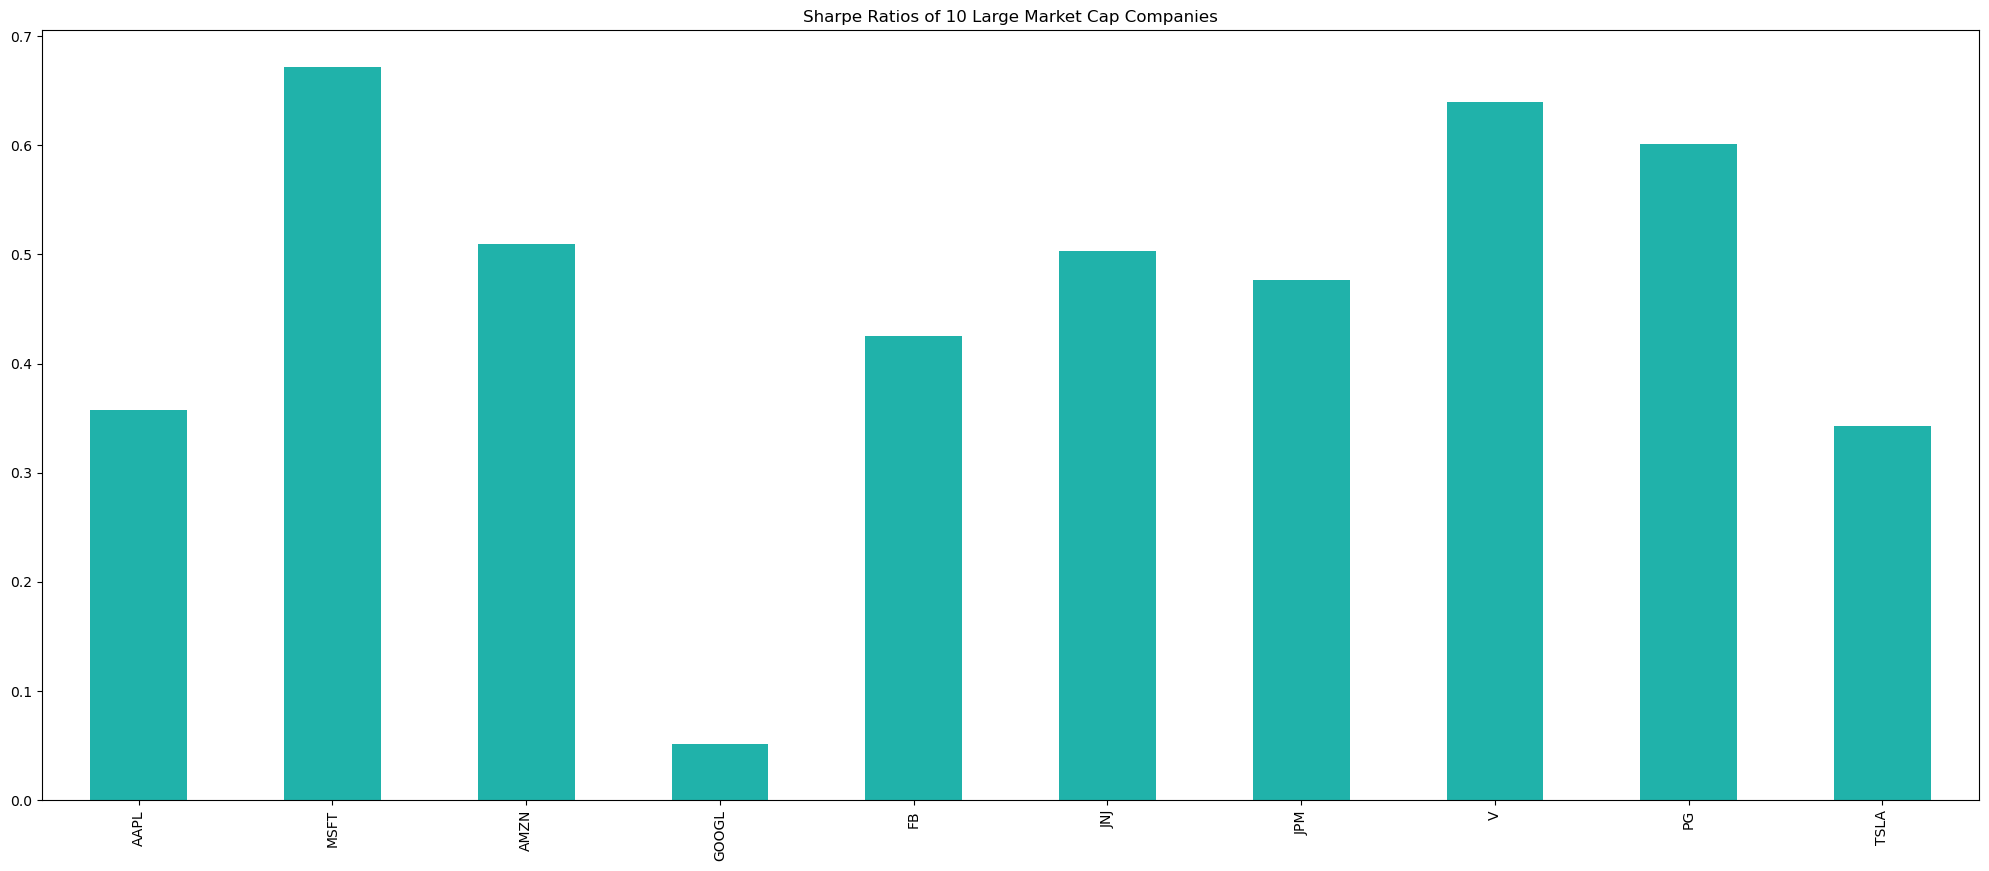

In [18]:
sharpe_ratios.plot.bar (figsize = (25, 10), title = "Sharpe Ratios of 10 Large Market Cap Companies", color = "lightseagreen")

In [120]:
import random
import pandas as pd

tickers = ["AAPL", "MSFT", "AMZN", "GOOGL", "FB", "JNJ", "JPM", "V", "PG", "TSLA"]

random_tickers = random.sample(tickers, 3)

print(random_tickers)


['MSFT', 'PG', 'JNJ']


In [121]:
import random
import pandas as pd

selected_portfolio = pd.concat([df_portfolio[ticker] for ticker in random_tickers], axis=1, keys=random_tickers)


In [122]:
from MCForecastTools import MCSimulation

MC_even_weight = MCSimulation(
    portfolio_data = selected_portfolio,
    weights = [.3, .3, .4],
    num_simulation = 100,
    num_trading_days = 252*5
)

display(MC_even_weight.portfolio_data.head())
display(MC_even_weight.portfolio_data.tail())

MSFT                                             \
                            open   high    low  close    volume trade_count   
timestamp                                                                     
2015-12-01 05:00:00+00:00  54.41  55.23  54.30  55.22  39952779      194807   
2015-12-02 05:00:00+00:00  55.32  55.96  55.06  55.21  47274879      225980   
2015-12-03 05:00:00+00:00  55.49  55.77  53.93  54.20  38627835      219413   
2015-12-04 05:00:00+00:00  54.12  56.23  54.10  55.91  43963662      232021   
2015-12-07 05:00:00+00:00  55.79  55.97  55.29  55.81  30709765      182309   

                                                      PG         ...  \
                                vwap daily_return   open   high  ...   
timestamp                                                        ...   
2015-12-01 05:00:00+00:00  54.877235          NaN  74.87  76.22  ...   
2015-12-02 05:00:00+00:00  55.484361    -0.000181  75.73  76.46  ...   
2015-12-03 05:00:00+00:00  54.475820    -0.018294  75.83  76.20  ...   
2015-12-04 05:00:00+00:00  55.540921     0.031550  75.98  77.90  ...   
2015-12-07 05:00:00+00:00  55.623798    -0.001789  77.54  78.50  ...   

                                                      JNJ                  \
                                vwap daily_return    open    high     low   
timestamp                                                                   
2015-12-01 05:00:00+00:00  75.783613          NaN  101.73  102.49  101.12   
2015-12-02 05:00:00+00:00  75.996004    -0.001975  102.50  102.93  101.99   
2015-12-03 05:00:00+00:00  75.636100    -0.000660  102.27  102.37  100.31   
2015-12-04 05:00:00+00:00  77.450477     0.027594  101.40  103.00  101.28   
2015-12-07 05:00:00+00:00  78.188738     0.006938  102.61  103.49  102.60   

                                                                     \
                            close    volume trade_count        vwap   
timestamp                                                             
2015-12-01 05:00:00+00:00  102.36   7545987       52841  102.081061   
2015-12-02 05:00:00+00:00  102.05   6623500       49147  102.377764   
2015-12-03 05:00:00+00:00  100.79  12008737       76170  100.983162   
2015-12-04 05:00:00+00:00  102.95   7845387       51047  102.519973   
2015-12-07 05:00:00+00:00  103.32   7265009       52050  103.190026   

                                        
                          daily_return  
timestamp                               
2015-12-01 05:00:00+00:00          NaN  
2015-12-02 05:00:00+00:00    -0.003029  
2015-12-03 05:00:00+00:00    -0.012347  
2015-12-04 05:00:00+00:00     0.021431  
2015-12-07 05:00:00+00:00     0.003594  

[5 rows x 24 columns]

MSFT                                      \
                             open    high       low   close    volume   
timestamp                                                               
2022-12-23 05:00:00+00:00  236.11  238.87  233.9428  238.73  21206982   
2022-12-27 05:00:00+00:00  238.70  238.93  235.8300  236.96  16688648   
2022-12-28 05:00:00+00:00  236.89  239.72  234.1700  234.53  17457104   
2022-12-29 05:00:00+00:00  235.65  241.92  235.6500  241.01  19770693   
2022-12-30 05:00:00+00:00  238.21  239.96  236.6600  239.82  21913909   

                                                                     PG  \
                          trade_count        vwap daily_return     open   
timestamp                                                                 
2022-12-23 05:00:00+00:00      258172  237.267141     0.002267  152.310   
2022-12-27 05:00:00+00:00      226696  237.264025    -0.007414  152.700   
2022-12-28 05:00:00+00:00      215793  236.250028    -0.010255  154.275   
2022-12-29 05:00:00+00:00      224833  240.183672     0.027630  152.810   
2022-12-30 05:00:00+00:00      243952  238.697630    -0.004938  152.430   

                                     ...                              JNJ  \
                               high  ...        vwap daily_return    open   
timestamp                            ...                                    
2022-12-23 05:00:00+00:00  152.9199  ...  152.484242     0.002825  176.67   
2022-12-27 05:00:00+00:00  154.3200  ...  153.755509     0.008714  178.11   
2022-12-28 05:00:00+00:00  154.6500  ...  152.925827    -0.012926  177.76   
2022-12-29 05:00:00+00:00  153.2400  ...  152.613608     0.004146  177.55   
2022-12-30 05:00:00+00:00  152.6800  ...  151.425747    -0.006750  177.49   

                                                                        \
                             high     low   close   volume trade_count   
timestamp                                                                
2022-12-23 05:00:00+00:00  177.52  175.81  177.48  3681652       50486   
2022-12-27 05:00:00+00:00  178.35  176.99  177.43  3061043       43418   
2022-12-28 05:00:00+00:00  178.45  176.65  176.66  2633210       43442   
2022-12-29 05:00:00+00:00  178.30  177.07  177.56  2821299       49264   
2022-12-30 05:00:00+00:00  177.77  175.40  176.65  4178049       49212   

                                                    
                                 vwap daily_return  
timestamp                                           
2022-12-23 05:00:00+00:00  177.082671     0.002542  
2022-12-27 05:00:00+00:00  177.587412    -0.000282  
2022-12-28 05:00:00+00:00  177.182421    -0.004340  
2022-12-29 05:00:00+00:00  177.741366     0.005095  
2022-12-30 05:00:00+00:00  176.432956    -0.005125  

[5 rows x 24 columns]

In [123]:
MC_even_weight.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998657,0.987110,1.010195,0.988643,0.999319,0.982599,0.996741,1.013318,1.014401,1.000929,...,1.005281,0.999542,0.989907,1.006533,0.989624,0.984880,0.993610,0.998253,0.990582,0.993607
2,1.017579,0.992066,1.021802,0.996967,1.007802,0.981188,0.997961,1.025980,1.019443,1.016251,...,1.013002,0.994468,0.981369,1.002451,0.997300,1.006027,1.002308,1.009292,1.001875,0.998956
3,1.036824,0.994329,1.014200,1.010198,0.999714,0.983847,0.980456,1.032287,1.003965,1.008912,...,1.013361,0.989077,1.007483,1.016362,0.991387,1.003789,1.003737,1.003063,1.008081,1.002552
4,1.036043,0.990677,1.005188,1.010561,0.987030,0.962855,0.983788,1.040087,1.006939,1.006717,...,1.027216,0.967129,1.022465,1.008618,0.972598,1.009056,1.004974,0.998575,1.001033,0.995270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,3.950573,1.148730,2.627732,1.506450,1.932522,2.904096,1.906850,1.254558,1.662547,2.071175,...,1.929937,1.768942,2.846743,1.541642,2.450245,1.014994,2.047282,1.511565,4.618977,1.629112
1257,3.996027,1.132810,2.648003,1.487795,1.937203,2.902497,1.913425,1.256159,1.676209,2.099455,...,1.966753,1.759978,2.871515,1.548754,2.458499,1.033727,2.056666,1.496158,4.645519,1.639992
1258,3.964980,1.147137,2.642959,1.498712,1.949658,2.925548,1.914005,1.258932,1.674469,2.080387,...,1.977640,1.772044,2.893136,1.527640,2.458258,1.038467,2.066593,1.484412,4.557570,1.646266
1259,3.897371,1.141285,2.620162,1.496059,1.963021,2.878258,1.918275,1.237609,1.687505,2.099967,...,1.970270,1.754044,2.882221,1.514706,2.497151,1.042967,2.051673,1.494712,4.546271,1.661098


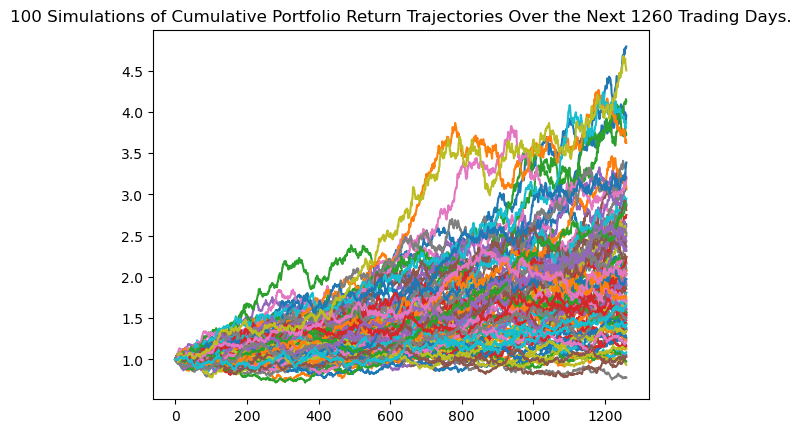

In [124]:
even_weight_line_plot = MC_even_weight.plot_simulation()

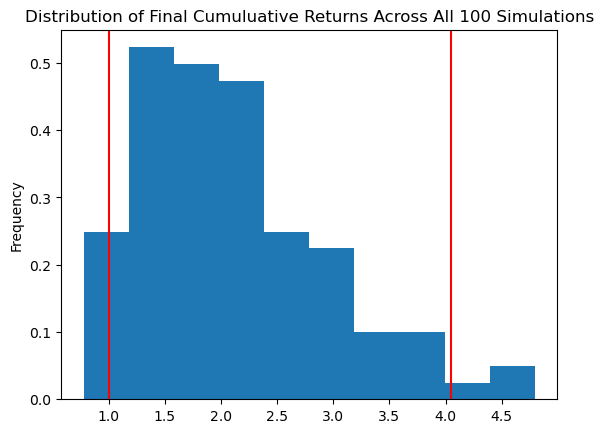

In [125]:
even_weight_distribution_plot = MC_even_weight.plot_distribution()

In [126]:
even_weight_table = MC_even_weight.summarize_cumulative_return()
print(even_weight_table)

count           100.000000
mean              2.108163
std               0.823060
min               0.780781
25%               1.530947
50%               1.972043
75%               2.516917
max               4.793958
95% CI Lower      1.000403
95% CI Upper      4.047507
Name: 1260, dtype: float64


C:\Users\zoeyli\Desktop\project-1\Cryptocurrency-Investment-Analyzer\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [127]:
ci_lower = round(even_weight_table[8] * 5000, 2)
ci_upper = round(even_weight_table[9] * 5000, 2)

print(f"There is a 95% chance that an initial investment of $5,000 in the portfolio over the next 5 years will end within in the range of ${ci_lower:,.2f} and ${ci_upper:,.2f}.")

There is a 95% chance that an initial investment of $5,000 in the portfolio over the next 5 years will end within in the range of $5,002.02 and $20,237.54.
